# **Goal : 다음 분기에 어떤 게임을 설계해야할까?**


In [195]:
import pandas as pd
import seaborn as sns
import numpy as np

url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

data = pd.read_csv(url)
data = data.drop(['Unnamed: 0'],axis=1)
data

np.sum(pd.isnull(data)) #결측치 갯수 확인 
data.dropna(inplace=True) #결측치 제거

drop_values_n = ['K','M'] #k,m 비정상적 데이터 삭제
data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']] = data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].astype(str)
df_n = data[~data['NA_Sales'].str.contains('|'.join(drop_values_n))]
df_n = df_n[~df_n['EU_Sales'].str.contains('|'.join(drop_values_n))]
df_n = df_n[~df_n['JP_Sales'].str.contains('|'.join(drop_values_n))]
df_n = df_n[~df_n['Other_Sales'].str.contains('|'.join(drop_values_n))]
df_n[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']] = df_n[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].astype(float)

df_n
df_n = df_n[df_n.Year >= 1800]

df_n['Total_Sales'] = df_n.loc[:,['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
df_n = df_n.sort_values('Total_Sales', ascending=False)

df_n.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
Total_Sales    float64
dtype: object

In [196]:
df_n = df_n.copy() #데이터 
df_n

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
7271,Honda ATV Fever,DS,2010.0,Racing,Storm City Games,0.01,0.00,0.00,0.00,0.01
9281,ESPN NBA 2Night 2002,XB,2002.0,Sports,Konami Digital Entertainment,0.01,0.00,0.00,0.00,0.01
5396,Grand Theft Auto III,PC,2002.0,Action,Take-Two Interactive,0.00,0.01,0.00,0.00,0.01
4275,Contrast,PC,2013.0,Platform,Focus Home Interactive,0.00,0.01,0.00,0.00,0.01


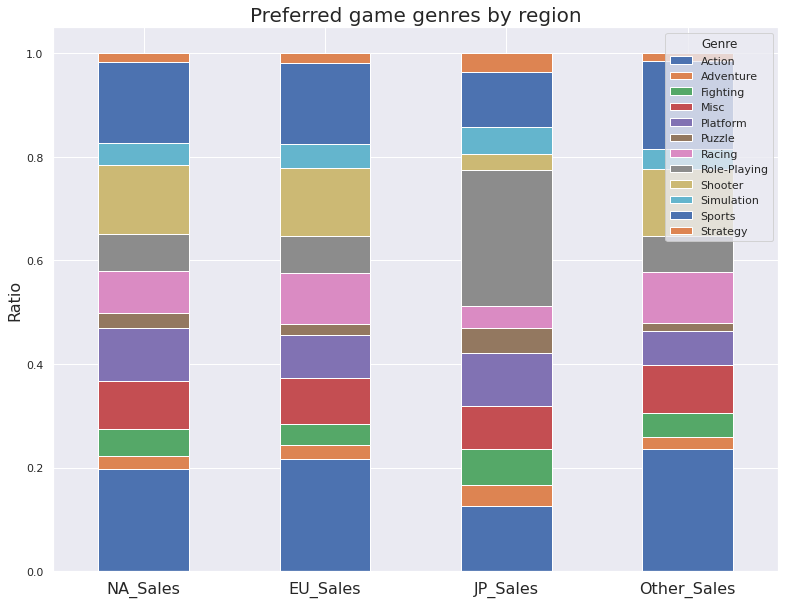

In [197]:
#지역에 따라서 선호하는 게임장르
import matplotlib.pyplot as plt 
import seaborn as sns

df1 = df_n.iloc[:,[5,6,7,8]] #.astype(float)
df2 = df_n.iloc[:,[3]]

con1 = pd.concat([df2,df1], axis=1)
grouped_Genre = con1.groupby('Genre').sum() 
grouped_Genre = grouped_Genre.T 

stand_Genre = grouped_Genre.div(grouped_Genre.sum(1),axis=0) #비율을 알고 싶기 때문에 로우 합이 1이 되도록 정규화
stand_Genre

#colors = sns.color_palette('hls',len(final3_head['Name'])
stand_Genre.plot.bar(stacked=True)
plt.ylabel('Ratio', size = 16)
plt.title('Preferred game genres by region', size = 20)
plt.xticks(rotation=0, size = 16);

fig = plt.gcf() #현재 figure에 불러오기
fig.set_size_inches(13, 10) #크기 바꾸기(inch 단위)

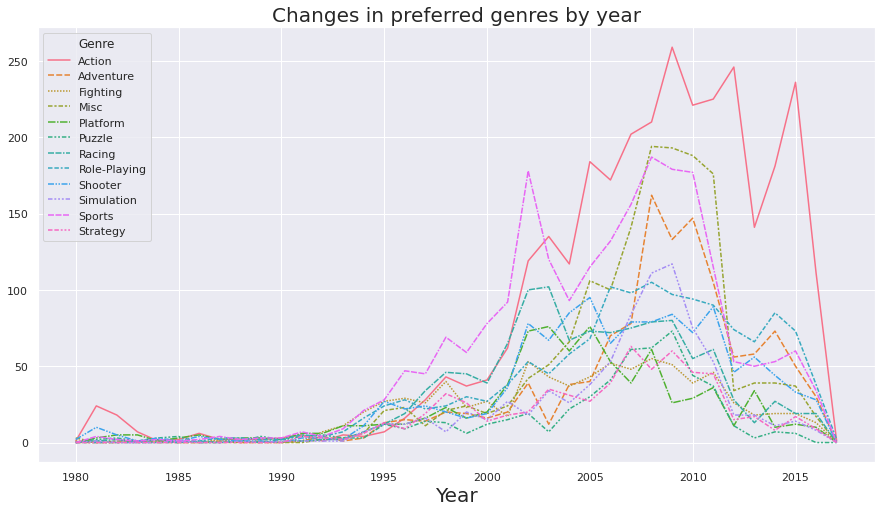

In [198]:
#연도별 선호하는 게임 장르
import seaborn as sns
data2_1 = pd.crosstab(index = df_n['Year'], columns = df_n['Genre']) #연도별 장르의 변화

sns.set(rc = {'figure.figsize':(15,8)})
a = sns.lineplot(data = data2_1)
a.set_title('Changes in preferred genres by year', fontsize = 20);
a.set_xlabel("Year", fontsize = 20);

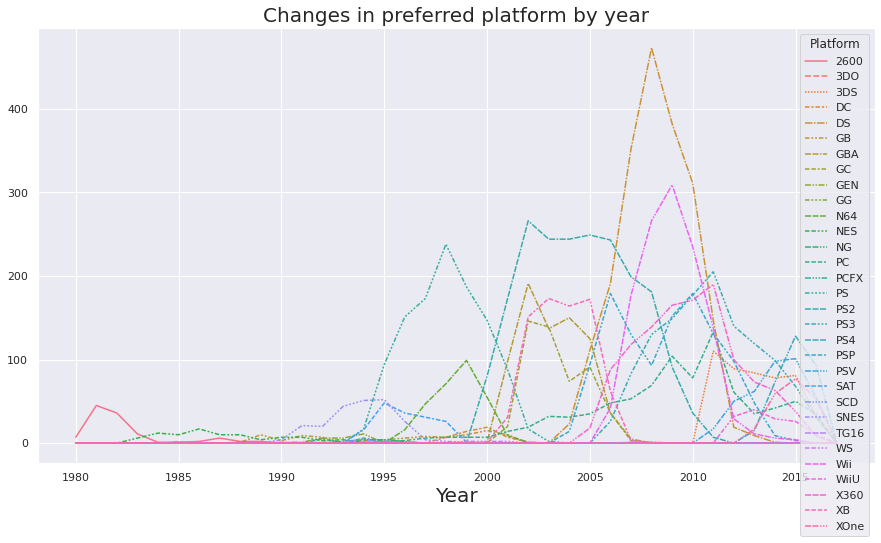

In [199]:
#연도별 플랫폼의 변화
import seaborn as sns
data2_2 = pd.crosstab(index = df_n['Year'], columns = df_n['Platform']) #연도별 플랫폼의 변화

sns.set(rc = {'figure.figsize':(15,8)})
b = sns.lineplot(data = data2_2)
b.set_title('Changes in preferred platform by year', fontsize = 20);
b.set_xlabel("Year", fontsize = 20);

In [200]:
#출고량이 높은 게임의 장르
data3 = df_n.loc[:,['Name','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
data3_1 = data3.sort_values('Total_Sales', ascending=False)
sales_31_head = data3_1.head(15)
sales_31_head

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Sports,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,Platform,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Racing,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Sports,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,1.00,31.38
1203,Tetris,Puzzle,23.20,2.26,4.22,0.58,30.26
6937,New Super Mario Bros.,Platform,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Misc,14.03,9.20,2.93,2.85,29.01
16531,New Super Mario Bros. Wii,Platform,14.59,7.06,4.70,2.26,28.61
10488,Duck Hunt,Shooter,26.93,0.63,0.28,0.47,28.31


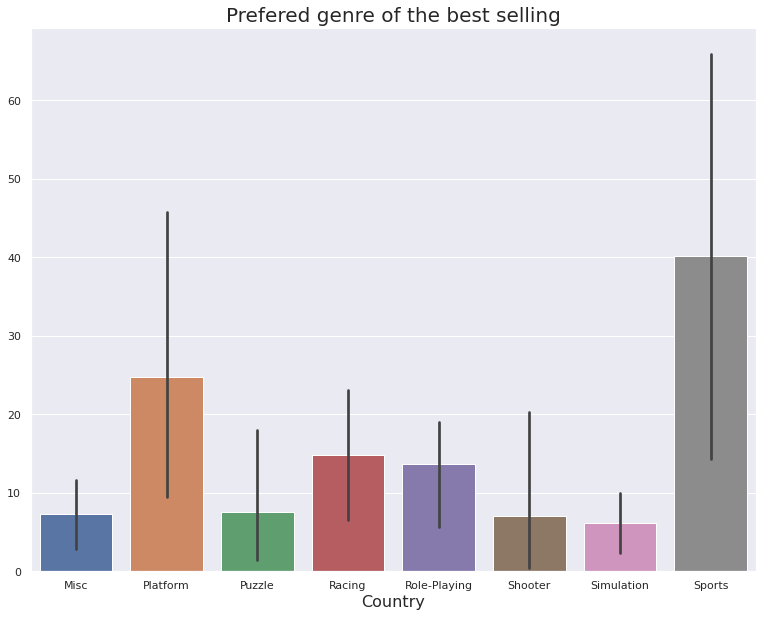

In [219]:
#출고량이 높은 게임의 장르
h = sales_31_head.groupby(by='Genre').sum()
h = h.drop('Total_Sales', axis = 'columns')
h = h.T
h

import seaborn as sns
import matplotlib.pylab as plt

sns.barplot(data= h);

colors = sns.color_palette('hls')
plt.title('Prefered genre of the best selling', size = 20)
plt.xlabel('Country', size = 16)
fig3 = plt.gcf() #현재 figure에 불러오기
fig3.set_size_inches(13, 10) #크기 바꾸기(inch 단위)

plt.show()

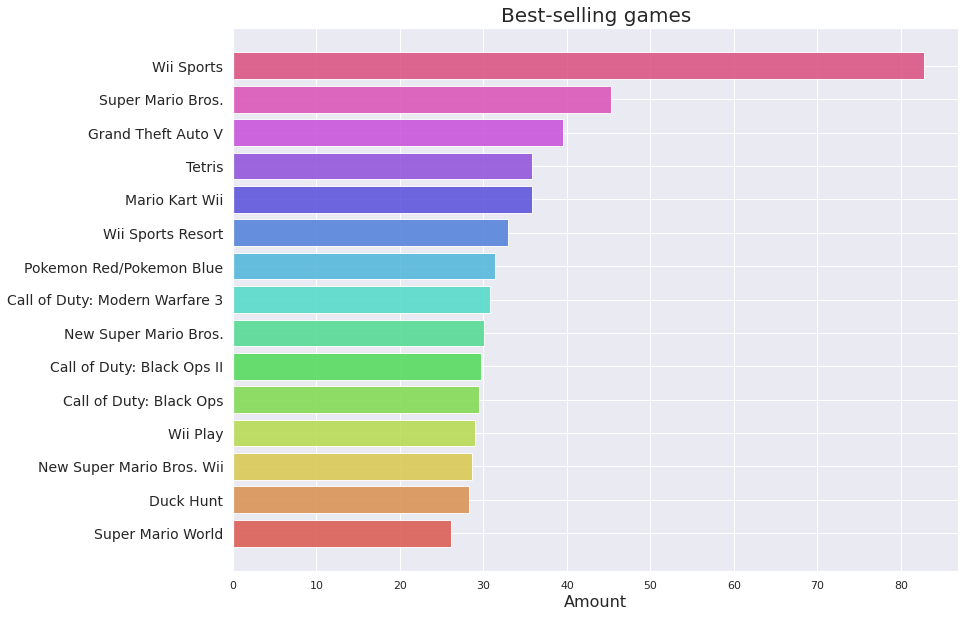

In [218]:
#출고량이 높은 게임
data3 = data3.groupby(by=['Name'],as_index=False).sum() 
data3 = data3.sort_values('Total_Sales', ascending=False)
data3_head = data3.head(15)
data3_head = data3_head.sort_values(by=['Total_Sales'], axis=0)
data3_head

import seaborn as sns
import matplotlib.pylab as plt

colors = sns.color_palette('hls',len(data3_head['Name']))
c = plt.barh(data3_head['Name'],data3_head['Total_Sales'], alpha=0.9, color=colors)
plt.title('Best-selling games', size = 20)
plt.xlabel('Amount', size = 16)
plt.yticks(fontsize = 14)
fig3 = plt.gcf() #현재 figure에 불러오기
fig3.set_size_inches(13, 10) #크기 바꾸기(inch 단위)

plt.show()

# **최근 5년의 게임시장의 변화**


In [202]:
#결측치 없앰 / 최근 5년 / 이름과 플랫폼으로 구분 / 판매량 많은 순 정렬 
#최근 5년의 게임시장 데이터
import pandas as pd

recent = df_n[df_n.Year >= 2015]
recent

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9070,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
2639,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
3024,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
15981,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.29
11292,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
...,...,...,...,...,...,...,...,...,...,...
12269,Infinite Stratos 2: Love and Purge,PSV,2015.0,Action,5pb,0.00,0.00,0.01,0.00,0.01
5402,Valentino Rossi: The Game,PC,2016.0,Racing,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01
4224,Kiniro no Corda 3,3DS,2015.0,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
6358,MXGP 2,PC,2016.0,Racing,Milestone S.r.l.,0.00,0.01,0.00,0.00,0.01


In [203]:
recent = recent.sort_values('Total_Sales', ascending=False)
recent.head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9070,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
2639,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
3024,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
15981,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.29
11292,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
5692,Splatoon,WiiU,2015.0,Shooter,Nintendo,1.55,1.15,1.44,0.43,4.57
13604,Uncharted: The Nathan Drake Collection,PS4,2015.0,Action,Sony Computer Entertainment,1.96,1.69,0.08,0.74,4.47
12167,Halo 5: Guardians,XOne,2015.0,Shooter,Microsoft Game Studios,2.64,1.20,0.03,0.39,4.26
16289,Fallout 4,XOne,2015.0,Role-Playing,Bethesda Softworks,2.45,1.26,0.01,0.37,4.09
10968,NBA 2K16,PS4,2015.0,Sports,Take-Two Interactive,2.48,0.65,0.03,0.69,3.85


In [204]:
#플랫폼과 장르 가설검정
df1_crosstable = pd.crosstab(recent['Platform'], recent['Genre'])
df1_crosstable
#귀무가설 : 플랫폼에 따라 장르에 차이가 없다. (플랫폼과 장르는 서로 독립)
#대립가설 : 플랫폼에 따라 장르에 차이가 있다. (플랫폼과 장르는 서로 연관)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,52,7,3,13,5,4,0,19,0,4,1,5
PC,20,5,2,2,1,0,8,7,11,9,6,14
PS3,43,9,5,7,0,0,2,10,4,1,18,0
PS4,81,14,13,8,6,1,11,36,20,4,26,2
PSP,3,0,0,0,0,0,0,0,0,0,0,0
PSV,72,34,2,8,3,0,1,29,0,1,5,3
Wii,3,0,0,1,0,0,0,0,0,0,0,0
WiiU,16,1,1,8,4,1,0,2,2,0,1,0
X360,16,4,1,2,1,0,2,0,3,1,16,0


In [205]:
from scipy import stats

stats.chi2_contingency(df1_crosstable)

#p_value가 4.615311183274297e-33 이므로 플랫폼과 장르는 연관이 있다.는 것을 증명

(370.8847889710506,
 4.615311183274297e-33,
 99,
 array([[4.38883929e+01, 1.00892857e+01, 4.03571429e+00, 6.81026786e+00,
         2.77455357e+00, 7.56696429e-01, 4.79241071e+00, 1.42511161e+01,
         7.69308036e+00, 2.77455357e+00, 1.18549107e+01, 3.27901786e+00],
        [3.30133929e+01, 7.58928571e+00, 3.03571429e+00, 5.12276786e+00,
         2.08705357e+00, 5.69196429e-01, 3.60491071e+00, 1.07198661e+01,
         5.78683036e+00, 2.08705357e+00, 8.91741071e+00, 2.46651786e+00],
        [3.84508929e+01, 8.83928571e+00, 3.53571429e+00, 5.96651786e+00,
         2.43080357e+00, 6.62946429e-01, 4.19866071e+00, 1.24854911e+01,
         6.73995536e+00, 2.43080357e+00, 1.03861607e+01, 2.87276786e+00],
        [8.62232143e+01, 1.98214286e+01, 7.92857143e+00, 1.33794643e+01,
         5.45089286e+00, 1.48660714e+00, 9.41517857e+00, 2.79977679e+01,
         1.51138393e+01, 5.45089286e+00, 2.32901786e+01, 6.44196429e+00],
        [1.16517857e+00, 2.67857143e-01, 1.07142857e-01, 1.80803571e-01

In [206]:
#최근 5년간 나라별 출고량 데이터
import seaborn as sns
recent_YS = recent.loc[:,['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']] 
recent_YS

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9070,2015.0,5.77,5.81,0.35,2.31
2639,2015.0,1.11,6.06,0.06,1.26
3024,2015.0,2.93,3.29,0.22,1.23
15981,2015.0,4.52,2.09,0.01,0.67
11292,2015.0,2.47,3.15,0.24,1.10
...,...,...,...,...,...
12992,2016.0,0.00,0.01,0.00,0.00
13215,2016.0,0.00,0.01,0.00,0.00
13758,2015.0,0.00,0.01,0.00,0.00
8088,2016.0,0.00,0.00,0.01,0.00


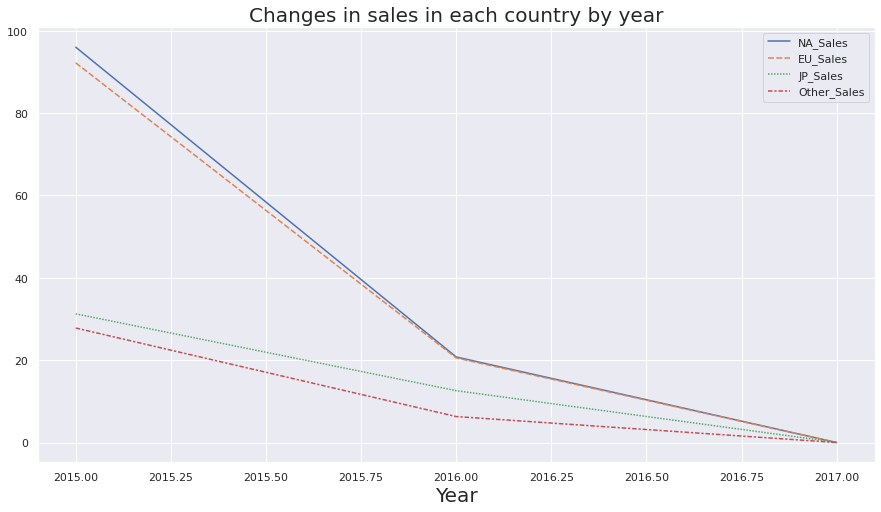

In [207]:
#최근 5년간 나라별 출고량 변화
recent_YS1 = recent_YS.groupby(by=['Year']).sum()  

sns.set(rc = {'figure.figsize':(15,8)})
YS = sns.lineplot(data = recent_YS1)
YS.set_title('Changes in sales in each country by year', fontsize = 20);
YS.set_xlabel("Year", fontsize = 20);
#NA와 유럽은 같은 모양의 그래프를 나타냄 

In [208]:
#북미출고량과 유럽출고량 가설검정
YS_crosstable = pd.crosstab(recent_YS['NA_Sales'], recent_YS['EU_Sales'])
YS_crosstable
#귀무가설 : NA_Sales에 따라 EU_Sales에 차이가 없다. (NA_Sales와 EU_Sales는 서로 독립)
#대립가설 : Na_Sales에 따라 EU_Sales에 차이가 있다. (NA_Sales와 EU_Sales는 서로 연관)

EU_Sales,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.36,0.37,0.38,0.40,0.41,0.42,...,0.54,0.56,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.68,0.69,0.74,0.76,0.78,0.89,0.93,0.96,1.00,1.01,1.02,1.15,1.16,1.20,1.22,1.26,1.35,1.49,1.58,1.61,1.69,1.92,1.98,2.09,2.11,3.15,3.29,5.81,6.06
NA_Sales,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.00,278,47,31,23,18,12,7,2,5,4,2,1,1,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.01,13,13,8,4,1,3,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.02,14,8,6,5,0,5,5,2,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.03,14,4,5,2,2,1,2,3,2,1,0,2,0,2,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.04,7,2,4,1,3,2,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [209]:
from scipy import stats

stats.chi2_contingency(YS_crosstable)

#p_value가  0.0 이므로 NA_Sales과 EU_Sales는 연관이 있다.는 것을 증명

(36642.288251915,
 0.0,
 7812,
 array([[1.65825893e+02, 4.09687500e+01, 3.07265625e+01, ...,
         4.87723214e-01, 4.87723214e-01, 4.87723214e-01],
        [1.78348214e+01, 4.40625000e+00, 3.30468750e+00, ...,
         5.24553571e-02, 5.24553571e-02, 5.24553571e-02],
        [1.89732143e+01, 4.68750000e+00, 3.51562500e+00, ...,
         5.58035714e-02, 5.58035714e-02, 5.58035714e-02],
        ...,
        [3.79464286e-01, 9.37500000e-02, 7.03125000e-02, ...,
         1.11607143e-03, 1.11607143e-03, 1.11607143e-03],
        [3.79464286e-01, 9.37500000e-02, 7.03125000e-02, ...,
         1.11607143e-03, 1.11607143e-03, 1.11607143e-03],
        [3.79464286e-01, 9.37500000e-02, 7.03125000e-02, ...,
         1.11607143e-03, 1.11607143e-03, 1.11607143e-03]]))

In [210]:
#한 게임에 여러플랫폼 존재 확인
np = recent.groupby(['Name', 'Platform']).sum()
np = np.sort_values('Name',key=lambda col: col.str.lower()) 
np.head(30)

Year  ...  Total_Sales
Name                                               Platform          ...             
12-Sai. Koisuru Diary                              3DS       2016.0  ...         0.04
3DS Classic Collection                             3DS       2016.0  ...         0.02
3rd Super Robot Wars Z: Tengoku-Hen                PS3       2015.0  ...         0.15
                                                   PSV       2015.0  ...         0.19
7 Days to Die                                      PS4       2016.0  ...         0.12
                                                   XOne      2016.0  ...         0.04
7 Roses: A Darkness Rises                          PC        2015.0  ...         0.02
7th Dragon III Code: VFD                           3DS       2015.0  ...         0.15
A Good Librarian Like a Good Shepherd: Library ... PSV       2015.0  ...         0.03
Abunai: Koi no Sousa Shitsu                        PSV       2015.0  ...         0.02
Act of Aggression                                  PC        2015.0  ...         0.01
Adventure Time: Finn & Jake Investigations         XOne      2015.0  ...         0.04
                                                   X360      2015.0  ...         0.09
                                                   WiiU      2015.0  ...         0.05
                                                   PS3       2015.0  ...         0.11
                                                   3DS       2015.0  ...         0.08
                                                   PS4       2015.0  ...         0.08
Aegis of Earth: Protonovus Assault                 PS3       2016.0  ...         0.02
                                                   PS4       2016.0  ...         0.02
                                                   PSV       2016.0  ...         0.04
Agatha Christie: The ABC Murders                   PC        2016.0  ...         0.02
Aikatsu! My No.1 Stage!                            3DS       2015.0  ...         0.07
Airship Q                                          PSV       2015.0  ...         0.03
Alia's Carnival! Sacrament                         PSV       2015.0  ...         0.03
Angelique Retour                                   PSV       2015.0  ...         0.02
Anima - Gate of Memories                           PS4       2016.0  ...         0.02
Animal Crossing: Amiibo Festival                   WiiU      2015.0  ...         0.42
Animal Crossing: Happy Home Designer               3DS       2015.0  ...         2.98
Anno 2205                                          PC        2015.0  ...         0.25
Ansatsu Kyoushitsu: Assassin Ikusei Keikaku!!      3DS       2016.0  ...         0.06

[30 rows x 6 columns]

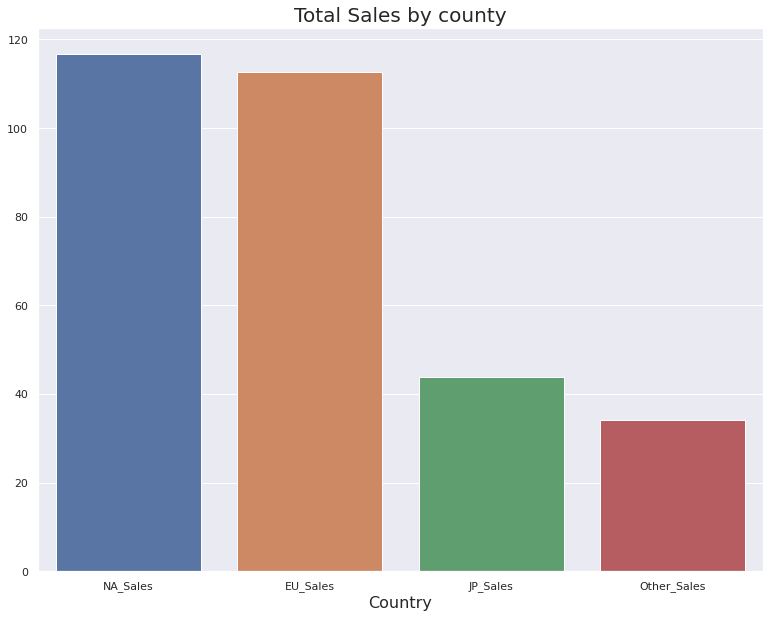

In [211]:
#최근 5년간 나라별 출고량 합계
F1 = recent['NA_Sales'].sum()
F2 = recent['EU_Sales'].sum()
F3 = recent['JP_Sales'].sum()
F4 = recent['Other_Sales'].sum()

#F_data = pd.DataFrame(data=[F1,F2,F3,F4], columns=['F1','F2','F3','F4'])

F_data = {'NA_Sales': [F1], 'EU_Sales': [F2],'JP_Sales': [F3],'Other_Sales': [F4]}
F_data = pd.DataFrame(data=F_data)
F_data

import seaborn as sns
import matplotlib.pylab as plt

sns.barplot(data= F_data);

colors = sns.color_palette('hls')
plt.title('Total Sales by county', size = 20)
plt.xlabel('Country', size = 16)
fig3 = plt.gcf() #현재 figure에 불러오기
fig3.set_size_inches(13, 10) #크기 바꾸기(inch 단위)

plt.show()

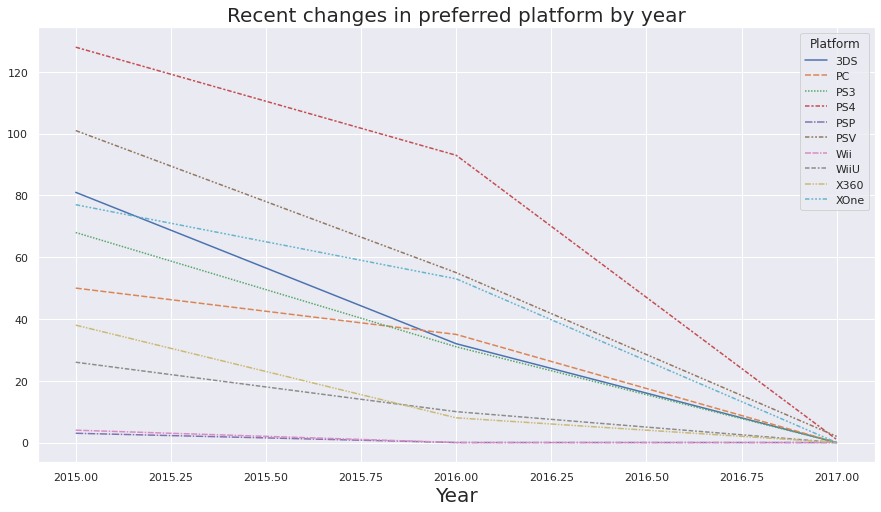

In [212]:
#최근 5년간 플랫폼 시장 변화

np2 = pd.crosstab(index = recent['Year'], columns = recent['Platform'])
np2

import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})
np2_line = sns.lineplot(data = np2)
np2_line.set_title('Recent changes in preferred platform by year', fontsize = 20);
np2_line.set_xlabel("Year", fontsize = 20);

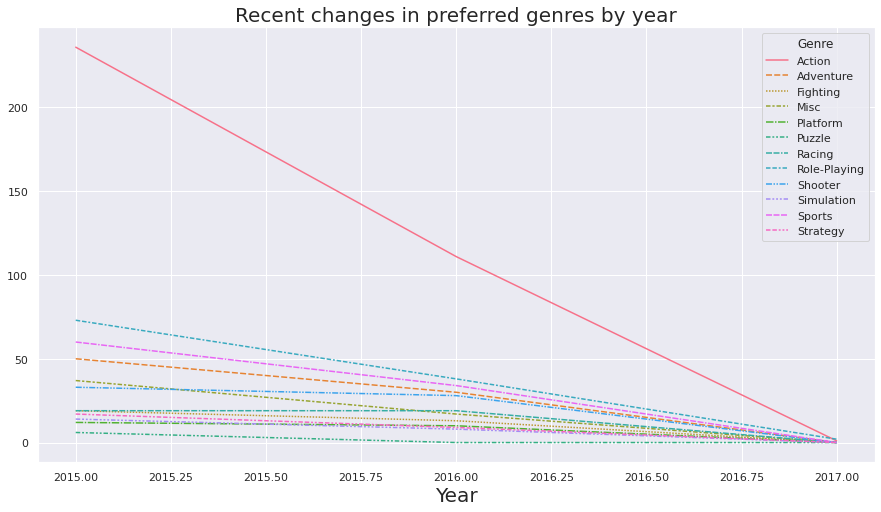

In [213]:
#최근 5년간 게임 장르의 트랜드
Genre = recent.loc[:,['Platform','Year','Genre']] #게임의 트랜드를 알기 위한 장르와 플랫폼 포함 데이터 
Genre2 = pd.crosstab(index = Genre['Year'], columns = Genre['Genre']) #연도별 장르의 변화량 추출

import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})
Genre_line = sns.lineplot(data = Genre2)
Genre_line.set_title('Recent changes in preferred genres by year', fontsize = 20);
Genre_line.set_xlabel("Year", fontsize = 20);

In [214]:
#결측치 없앰 / 최근 5년 / 배급사로 구분 / 판매량 많은 순 정렬
pub = recent.groupby(['Publisher']).mean()
pub = pub.sort_values('Total_Sales', ascending=False)
pub.head(15)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,,
Sony Computer Entertainment Europe,2015.000000,0.440000,0.890000,0.050000,0.250000,1.630000
Hello Games,2016.000000,0.580000,0.740000,0.020000,0.260000,1.600000
Bethesda Softworks,2015.214286,0.581429,0.559286,0.022143,0.171429,1.334286
Microsoft Game Studios,2015.444444,0.775556,0.353333,0.024444,0.115556,1.268889
Level 5,2015.500000,0.000000,0.000000,1.032500,0.000000,1.032500
Electronic Arts,2015.387755,0.377143,0.486939,0.013265,0.129592,1.006939
Sony Computer Entertainment,2015.333333,0.400833,0.299167,0.018333,0.144167,0.862500
"mixi, Inc",2015.000000,0.000000,0.000000,0.860000,0.000000,0.860000
Activision,2015.254902,0.358627,0.282549,0.012353,0.098039,0.751569


In [215]:
#출고량이 높은 게임에 대한 분석
sales_2 = recent.loc[:,['Name','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
sales_22 = sales_2.sort_values('Total_Sales', ascending=False)
sales_22_head = sales_22.head(15)
sales_22_head

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9070,Call of Duty: Black Ops 3,Shooter,5.77,5.81,0.35,2.31,14.24
2639,FIFA 16,Sports,1.11,6.06,0.06,1.26,8.49
3024,Star Wars Battlefront (2015),Shooter,2.93,3.29,0.22,1.23,7.67
15981,Call of Duty: Black Ops 3,Shooter,4.52,2.09,0.01,0.67,7.29
11292,Fallout 4,Role-Playing,2.47,3.15,0.24,1.10,6.96
5692,Splatoon,Shooter,1.55,1.15,1.44,0.43,4.57
13604,Uncharted: The Nathan Drake Collection,Action,1.96,1.69,0.08,0.74,4.47
12167,Halo 5: Guardians,Shooter,2.64,1.20,0.03,0.39,4.26
16289,Fallout 4,Role-Playing,2.45,1.26,0.01,0.37,4.09
10968,NBA 2K16,Sports,2.48,0.65,0.03,0.69,3.85


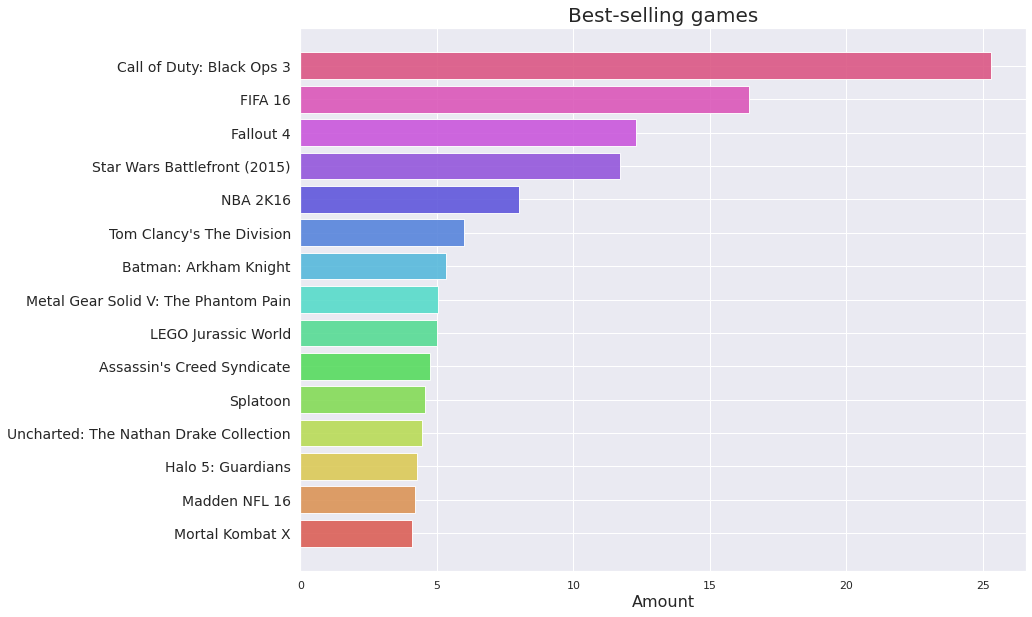

In [216]:
#가장 출고량 높은 게임
sales = sales_2.groupby(by=['Name'],as_index=False).sum() 
sales = sales.sort_values('Total_Sales', ascending=False)
sales_head = sales.head(15)

sales_head = sales_head.sort_values(by=['Total_Sales'], axis=0)
sales_head

import seaborn as sns
import matplotlib.pylab as plt

colors = sns.color_palette('hls',len(sales_head['Name']))
c = plt.barh(sales_head['Name'],sales_head['Total_Sales'], alpha=0.9, color=colors)
plt.title('Best-selling games', size = 20)
plt.xlabel('Amount', size = 16)
plt.yticks(fontsize = 14)
fig3 = plt.gcf() #현재 figure에 불러오기
fig3.set_size_inches(13, 10) #크기 바꾸기(inch 단위)

plt.show()

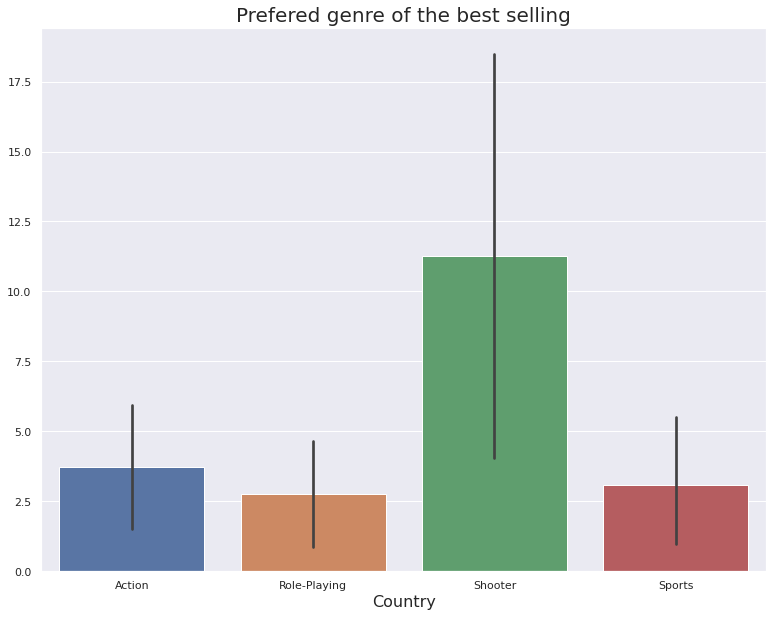

In [217]:
#출고량 높은 게임들의 장르
sales_2 = recent.loc[:,['Name','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
sales_2 = sales_2.sort_values('Total_Sales', ascending=False)
sales2_head = sales_2.head(15)

g = sales2_head.groupby(by='Genre').sum()
g = g.drop('Total_Sales', axis = 'columns')
g = g.T
g

import seaborn as sns
import matplotlib.pylab as plt

sns.barplot(data= g);

colors = sns.color_palette('hls')
plt.title('Prefered genre of the best selling', size = 20)
plt.xlabel('Country', size = 16)
fig3 = plt.gcf() #현재 figure에 불러오기
fig3.set_size_inches(13, 10) #크기 바꾸기(inch 단위)

plt.show()